In [2]:
# 파이썬 ≥3.5 필수
import sys

import pydot as pydot


assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
assert tf.__version__ >= "2.0"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


그림 저장: perceptron_iris_plot


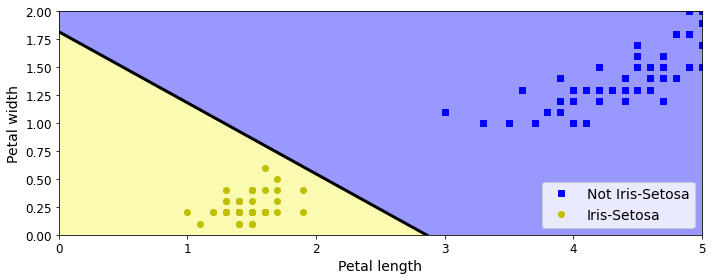

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

In [5]:
from tensorflow import keras
tf.__version__
keras.__version__

'2.5.0'

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype


dtype('uint8')

In [9]:
# 검증 데이터 로 나누고 한 픽셀을 255 -> 0~1 사이의 값으로 만들어준다.
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

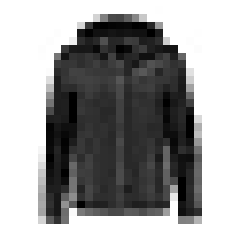

In [10]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()


In [11]:
y_train


array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

그림 저장: fashion_mnist_plot


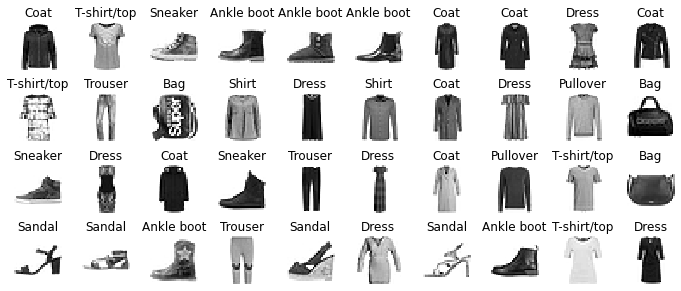

In [13]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()


In [14]:
# make model by using sequential API
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
'''
--same
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
'''

'\n--same\nmodel = keras.models.Sequential([\n    keras.layers.Flatten(input_shape=[28, 28]),\n    keras.layers.Dense(300, activation="relu"),\n    keras.layers.Dense(100, activation="relu"),\n    keras.layers.Dense(10, activation="softmax")\n])\n'

In [15]:
model.layers


In [16]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


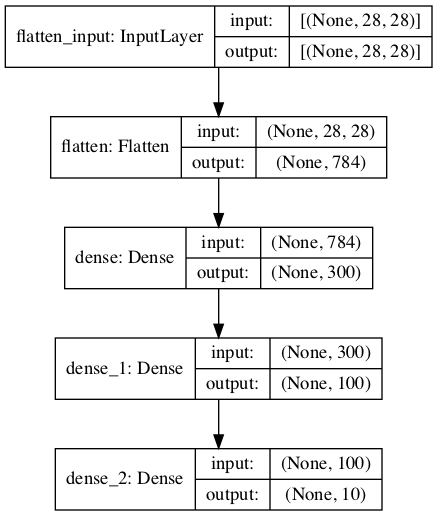

In [17]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [18]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [19]:
weights, biases = hidden1.get_weights()


In [20]:
weights

array([[ 0.05252807,  0.06683281, -0.03552435, ...,  0.04951082,
         0.03994038, -0.04071343],
       [-0.01837798, -0.04957035, -0.06081592, ..., -0.06216352,
         0.0587447 , -0.05042542],
       [ 0.06025408,  0.02836987, -0.0737615 , ..., -0.06321796,
        -0.04815421, -0.03662404],
       ...,
       [ 0.05129431, -0.04301133,  0.03132965, ..., -0.0291828 ,
        -0.05519809, -0.04042971],
       [ 0.01956391, -0.05252437, -0.00045037, ...,  0.0360029 ,
        -0.03104422,  0.06449015],
       [ 0.02782834,  0.05840088,  0.0588184 , ..., -0.03365039,
        -0.01722394, -0.04076984]], dtype=float32)

In [21]:
weights.shape


(784, 300)

In [22]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [24]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7202 - accuracy: 0.7662 - val_loss: 0.5001 - val_accuracy: 0.8352

In [25]:
history.params


{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [26]:
print(history.epoch)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

그림 저장: keras_learning_curves_plot


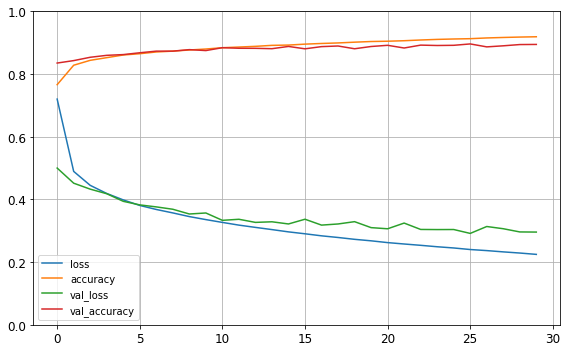

In [28]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 748us/step - loss: 0.3254 - accuracy: 0.8870


[0.3253989815711975, 0.8870000243186951]

In [30]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [31]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [32]:
np.random.seed(42)
tf.random.set_seed(42)



In [33]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)


/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
363/363 [==============================] - 1s 886us/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 728us/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 712us/step - loss: 0.6345 - val_loss: 0.6099

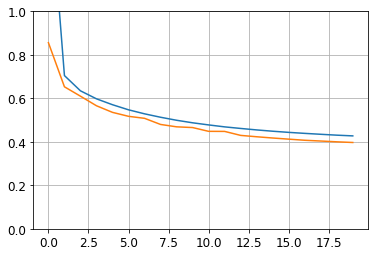

In [34]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [35]:
# 캘리포티아 주택 셋
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [38]:
np.random.seed(42)
tf.random.set_seed(42)


model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [39]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [41]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.1365 - output_1_loss: 1.9196 - output_2_loss: 4.0890 - val_loss: 1.6233 - val_output_1_loss: 0.8468 - val_output_2_loss: 8.6117
Epoch 2/10
363/363 [==============================] - 0s 918us/step - loss: 0.8905 - output_1_loss: 0.6969 - output_2_loss: 2.6326 - val_loss: 1.5163 - val_output_1_loss: 0.6836 - val_output_2_

In [42]:
np.random.seed(42)
tf.random.set_seed(42)


In [43]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [44]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 1ms/s

In [45]:
model.save("my_keras_model.h5")


In [46]:
model = keras.models.load_model("my_keras_model.h5")


In [47]:
model.predict(X_new)

array([[0.5400236],
       [1.6505971],
       [3.0098243]], dtype=float32)

In [48]:
# 모델 웨이트 저장, 불러오기
model.save_weights("my_keras_weights.ckpt")
model.load_weights("my_keras_weights.ckpt")

# 오랜시간 훈련 대비 모델 체크포인트 설정.

In [49]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [50]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])


In [51]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # 최상의 모델로 롤백
mse_test = model.evaluate(X_test, y_test)


Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 715us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 754us/step - loss: 0.5934 - val_loss: 0.5803

# 조기종료

In [53]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)



Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4393 - val_loss: 0.4110
Epoch 2/100
363/363 [==============================] - 0s 711us/step - loss: 0.4315 - val_loss: 0.4266
Epoch 3/100
363/363 [==============================] - 0s 798us/step - loss: 0.4259 - val_loss: 0.3996

In [54]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

363/363 [==============================] - 1s 2ms/step - loss: 0.3302 - val_loss: 0.3559

val/train: 1.08


# tensorboard
> rood directory setting

In [55]:
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2021_08_09-14_06_21'

In [56]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


In [58]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [59]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 1.8542 - val_loss: 1.3779
Epoch 2/30
363/363 [==============================] - 0s 782us/step - loss: 0.7854 - val_loss: 0.6885
Epoch 3/30
363/363 [==============================] - 0s 735us

In [60]:
root_logdir


'./my_logs'

In [61]:
run_logdir2 = get_run_logdir()
run_logdir2


'./my_logs/run_2021_08_09-14_13_09'

In [62]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


In [64]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [65]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5765 - val_loss: 4.8654
Epoch 2/30
363/363 [==============================] - 0s 748us/step - loss: 0.5506 - val_loss: 2.4561
Epoch 3/30
363/363 [==============================] - 0s 741us/step - loss: 0.4120 - val_loss: 0.3365

In [66]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


In [67]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model


In [68]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [70]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])


Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.1971 - val_loss: 1.7696
Epoch 2/100
363/363 [==============================] - 0s 670us/step - loss: 0.6045 - val_loss: 0.5361
Epoch 3/100
363/363 [==============================] - 0s 682us/step - loss: 0.5203 - val_loss: 0.5093

In [71]:
mse_test = keras_reg.score(X_test, y_test)


162/162 [==============================] - 0s 664us/step - loss: 0.3422


In [72]:
y_pred = keras_reg.predict(X_new)


In [73]:
np.random.seed(42)
tf.random.set_seed(42)


In [74]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100


/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 1ms/step - loss: 0.8420 - val_loss: 0.4703
Epoch 2/100
242/242 [==============================] - 0s 749us/step - loss: 0.4815 - val_loss: 0.4247
Epoch 3/100
242/242 [==============================] - 0s 834us/step - loss: 0.4519 - val_loss: 0.4052
Epoch 4/100
242/242 [==============================] - 0s 711us/step - loss: 0.4429 - val_loss: 0.3975

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 1ms/step - loss: 0.7452 - val_loss: 0.4860
Epoch 2/100
242/242 [==============================] - 0s 986us/step - loss: 0.4649 - val_loss: 0.4280
Epoch 3/100
242/242 [==============================] - 0s 785us/step - loss: 0.4495 - val_loss: 0.5791
Epoch 4/100
242/242 [==============================] - 0s 720us/step - loss: 0.4438 - val_loss: 0.4549

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 10.8725 - val_loss: 4.2468
Epoch 2/100
242/242 [==============================] - 0s 694us/step - loss: 1.0257 - val_loss: 0.5794
Epoch 3/100
242/242 [==============================] - 0s 698us/step - loss: 0.5263 - val_loss: 0.4357
Epoch 4/100
242/242 [==============================] - 0s 743us/step - loss: 0.4640 - val_loss: 0.4169

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 1ms/step - loss: 1.1684 - val_loss: 6.2480
Epoch 2/100
242/242 [==============================] - 0s 841us/step - loss: 0.6285 - val_loss: 5.2166
Epoch 3/100
242/242 [==============================] - 0s 855us/step - loss: 0.5212 - val_loss: 0.4474
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4280 - val_loss: 0.3901

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 0.8828 - val_loss: 3.5738
Epoch 2/100
242/242 [==============================] - 0s 823us/step - loss: 0.4887 - val_loss: 0.7767
Epoch 3/100
242/242 [==============================] - 0s 851us/step - loss: 0.4267 - val_loss: 0.5515
Epoch 4/100
242/242 [==============================] - 0s 868us/step - loss: 0.4011 - val_loss: 0.5335

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 1.0015 - val_loss: 2.9433
Epoch 2/100
242/242 [==============================] - 0s 819us/step - loss: 0.5546 - val_loss: 4.2557
Epoch 3/100
242/242 [==============================] - 0s 835us/step - loss: 0.4854 - val_loss: 2.8526
Epoch 4/100
242/242 [==============================] - 0s 879us/step - loss: 0.4594 - val_loss: 1.6798

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 4.3936 - val_loss: 13.3699
Epoch 2/100
242/242 [==============================] - 0s 773us/step - loss: 2.2098 - val_loss: 10.8972
Epoch 3/100
242/242 [==============================] - 0s 791us/step - loss: 1.4360 - val_loss: 7.7330
Epoch 4/100
242/242 [==============================] - 0s 774us/step - loss: 1.0926 - val_loss: 5.0744

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 3.4569 - val_loss: 7.5238
Epoch 2/100
242/242 [==============================] - 0s 779us/step - loss: 1.5656 - val_loss: 8.6120
Epoch 3/100
242/242 [==============================] - 0s 812us/step - loss: 1.0607 - val_loss: 8.4896
Epoch 4/100
242/242 [==============================] - 0s 805us/step - loss: 0.8953 - val_loss: 7.7423

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 4.0974 - val_loss: 7.4460
Epoch 2/100
242/242 [==============================] - 0s 770us/step - loss: 2.1844 - val_loss: 5.2071
Epoch 3/100
242/242 [==============================] - 0s 780us/step - loss: 1.4253 - val_loss: 2.9554
Epoch 4/100
242/242 [==============================] - 0s 784us/step - loss: 1.0762 - val_loss: 1.7752

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 2ms/step - loss: 2.0765 - val_loss: 1.3536
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7485 - val_loss: 0.7463
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6415 - val_loss: 0.5899

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 1.8880 - val_loss: 3.4090
Epoch 2/100
242/242 [==============================] - 0s 855us/step - loss: 0.7244 - val_loss: 1.6754
Epoch 3/100
242/242 [==============================] - 0s 836us/step - loss: 0.6372 - val_loss: 0.9319
Epoch 4/100
242/242 [==============================] - 0s 827us/step - loss: 0.5910 - val_loss: 0.6042

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 2.1014 - val_loss: 2.1643
Epoch 2/100
242/242 [==============================] - 0s 850us/step - loss: 0.7146 - val_loss: 0.6141
Epoch 3/100
242/242 [==============================] - 0s 870us/step - loss: 0.6063 - val_loss: 0.5601
Epoch 4/100
242/242 [==============================] - 0s 852us/step - loss: 0.5633 - val_loss: 0.5241

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 956us/step - loss: 1.2908 - val_loss: 297.3652
Epoch 2/100
242/242 [==============================] - 0s 673us/step - loss: 2.1716 - val_loss: 539.0366
Epoch 3/100
242/242 [==============================] - 0s 700us/step - loss: 6.2333 - val_loss: 3736.4509
Epoch 4/100
242/242 [==============================] - 0s 737us/step - loss: 11.9933 - val_loss: 12227.6924

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 943us/step - loss: 1.0446 - val_loss: 15.8284
Epoch 2/100
242/242 [==============================] - 0s 703us/step - loss: 0.5210 - val_loss: 22.4892
Epoch 3/100
242/242 [==============================] - 0s 671us/step - loss: 0.5063 - val_loss: 24.7894
Epoch 4/100
242/242 [==============================] - 0s 660us/step - loss: 0.5101 - val_loss: 22.4864

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 921us/step - loss: 1.2328 - val_loss: 307.7495
Epoch 2/100
242/242 [==============================] - 0s 664us/step - loss: 0.9214 - val_loss: 76.3014
Epoch 3/100
242/242 [==============================] - 0s 671us/step - loss: 1.3774 - val_loss: 795.2290
Epoch 4/100
242/242 [==============================] - 0s 670us/step - loss: 34.9847 - val_loss: 704.0445

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 1ms/step - loss: 1.2632 - val_loss: 1.4543
Epoch 2/100
242/242 [==============================] - 0s 870us/step - loss: 0.6364 - val_loss: 0.9557
Epoch 3/100
242/242 [==============================] - 0s 881us/step - loss: 0.5396 - val_loss: 0.4628
Epoch 4/100
242/242 [==============================] - 0s 8

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 1ms/step - loss: 1.0130 - val_loss: 0.5822
Epoch 2/100
242/242 [==============================] - 0s 840us/step - loss: 0.5558 - val_loss: 0.4873
Epoch 3/100
242/242 [==============================] - 0s 857us/step - loss: 0.4781 - val_loss: 0.4420
Epoch 4/100
242/242 [==============================] - 0s 853us/step - loss: 0.4376 - val_loss: 0.4139

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 1.1090 - val_loss: 0.6796
Epoch 2/100
242/242 [==============================] - 0s 816us/step - loss: 0.5639 - val_loss: 0.4957
Epoch 3/100
242/242 [==============================] - 0s 861us/step - loss: 0.4920 - val_loss: 0.4633
Epoch 4/100
242/242 [==============================] - 0s 828us/step - loss: 0.4547 - val_loss: 0.4565

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 2.1150 - val_loss: 29.5063
Epoch 2/100
242/242 [==============================] - 0s 776us/step - loss: 1.0854 - val_loss: 33.7785
Epoch 3/100
242/242 [==============================] - 0s 772us/step - loss: 0.9418 - val_loss: 4.0125
Epoch 4/100
242/242 [==============================] - 0s 762us/step - loss: 0.6369 - val_loss: 0.5556

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 1.8463 - val_loss: 0.7805
Epoch 2/100
242/242 [==============================] - 0s 789us/step - loss: 0.7088 - val_loss: 1.1550
Epoch 3/100
242/242 [==============================] - 0s 782us/step - loss: 0.6196 - val_loss: 1.8115
Epoch 4/100
242/242 [==============================] - 0s 758us/step - loss: 0.5692 - val_loss: 2.6113

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 1.7445 - val_loss: 2.5834
Epoch 2/100
242/242 [==============================] - 0s 778us/step - loss: 0.7268 - val_loss: 3.5564
Epoch 3/100
242/242 [==============================] - 0s 777us/step - loss: 0.6419 - val_loss: 1.7895
Epoch 4/100
242/242 [==============================] - 0s 788us/step - loss: 0.6134 - val_loss: 1.7436

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 1.0682 - val_loss: 6.4183
Epoch 2/100
242/242 [==============================] - 0s 855us/step - loss: 0.7154 - val_loss: 16.7917
Epoch 3/100
242/242 [==============================] - 0s 884us/step - loss: 0.5830 - val_loss: 4.7824
Epoch 4/100
242/242 [==============================] - 0s 856us/step - loss: 0.4475 - val_loss: 8.6078

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 2ms/step - loss: 0.8717 - val_loss: 0.7369
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5007 - val_loss: 0.4431
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4272 - val_loss: 0.3919

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 1ms/step - loss: 0.9177 - val_loss: 0.9196
Epoch 2/100
242/242 [==============================] - 0s 879us/step - loss: 0.4767 - val_loss: 2.1025
Epoch 3/100
242/242 [==============================] - 0s 914us/step - loss: 0.4329 - val_loss: 3.5511

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 1ms/step - loss: 0.9615 - val_loss: 10.9251
Epoch 2/100
242/242 [==============================] - 0s 870us/step - loss: 0.5921 - val_loss: 3.3912
Epoch 3/100
242/242 [==============================] - 0s 946us/step - loss: 0.4539 - val_loss: 0.4039
Epoch 4/100
242/242 [==============================] - 0s 905

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 1ms/step - loss: 0.8381 - val_loss: 0.6551
Epoch 2/100
242/242 [==============================] - 0s 919us/step - loss: 0.4570 - val_loss: 0.4129
Epoch 3/100
242/242 [==============================] - 0s 892us/step - loss: 0.4107 - val_loss: 0.6097

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 1ms/step - loss: 0.8683 - val_loss: 2.2007
Epoch 2/100
242/242 [==============================] - 0s 831us/step - loss: 0.5072 - val_loss: 3.3028
Epoch 3/100
242/242 [==============================] - 0s 837us/step - loss: 0.4486 - val_loss: 0.9130
Epoch 4/100
242/242 [==============================] - 0s 836us/step - loss: 0.4071 - val_loss: 0.5328

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 1.2259 - val_loss: 0.5753
Epoch 2/100
242/242 [==============================] - 0s 832us/step - loss: 0.5658 - val_loss: 8.9878
Epoch 3/100
242/242 [==============================] - 0s 889us/step - loss: 0.5484 - val_loss: 11.0986
Epoch 4/100
242/242 [==============================] - 0s 870us/step - loss: 0.5602 - val_loss: 1.1306

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 1.1975 - val_loss: 0.8898
Epoch 2/100
242/242 [==============================] - 0s 805us/step - loss: 0.5319 - val_loss: 0.5270
Epoch 3/100
242/242 [==============================] - 0s 823us/step - loss: 0.4524 - val_loss: 0.4844
Epoch 4/100
242/242 [==============================] - 0s 799us/step - loss: 0.4199 - val_loss: 0.4250

/opt/anaconda3/envs/Hands-On/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 0s 1ms/step - loss: 1.1315 - val_loss: 2.8528
Epoch 2/100
242/242 [==============================] - 0s 849us/step - loss: 0.6016 - val_loss: 2.3412
Epoch 3/100
242/242 [==============================] - 0s 859us/step - loss: 0.5108 - val_loss: 0.9015
Epoch 4/100
242/242 [==============================] - 0s 819us/step - loss: 0.4594 - val_loss: 0.8313

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fb0bdbe5290>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302,
                                                          0.0...
                                                          0.00502142573

In [75]:
rnd_search_cv.best_params_


{'n_neurons': 74, 'n_hidden': 3, 'learning_rate': 0.005803602934201024}

In [76]:
rnd_search_cv.best_score_


-0.31833014885584515

In [77]:
rnd_search_cv.best_estimator_


In [78]:
rnd_search_cv.score(X_test, y_test)


162/162 [==============================] - 0s 1ms/step - loss: 0.3029


-0.30288204550743103

In [79]:
model.evaluate(X_test, y_test)


162/162 [==============================] - 0s 575us/step - loss: 0.2916


0.291565865278244